#### Testing original traffic conditions

In [1]:
import traci
import os
import sys
import keyboard
import time

# --- Configuration ---
# Define the path 
project_path = r"Original network results/"

# Change path to working directory
if os.path.exists(project_path):
    os.chdir(project_path)
    print(f"working directory: {os.getcwd()}")
else:
    sys.exit(f"Path {project_path} does not exist.")

# --- Configuration ---
if 'SUMO_HOME' in os.environ:
    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
    sys.path.append(tools)
else:
    sys.exit("Please declare environment variable 'SUMO_HOME'")

sumoBinary = "sumo-gui"  # Use 'sumo-gui' to see the simulation
sumoCmd = [sumoBinary, "-c", "ff_heterogeneous.sumocfg", "--start", "--quit-on-end"]

def run_simulation():
    traci.start(sumoCmd)
    
    tls_ids = ["E1", "E2", "E3", "E4"]
    program_id = "default"  # The ID you want to test

    for tls in tls_ids:
        # Get the list of available programs in the loaded file
        programmi_esistenti = traci.trafficlight.getAllProgramLogics(tls)
        ids_disponibili = [p.programID for p in programmi_esistenti]
        
        if program_id in ids_disponibili:
            traci.trafficlight.setProgram(tls, program_id)
            print(f"{tls}: Program '{program_id}' successfully activated.")
        else:
            # If the ID does not exist, stop everything and print what is available!
            print(f"CRITICAL ERROR on {tls}: The program '{program_id}' DOES NOT EXIST.")
            print(f"   Available IDs: {ids_disponibili}")
            traci.close()
            sys.exit("Simulation interrupted: Check the additional.xml file")

    # 1. Define the route once at the beginning
    traci.route.add("bus_route_2", ["E0E1", "E1E2", "E2E3", "E3E4", "E4E5"])
    
    bus_count = 0
    
    while traci.simulation.getTime() <= 3600:
        traci.simulationStep() # Advance by one second (or one step)
        
        sim_time = traci.simulation.getTime()
        
        # 2. Check if a bus needs to be added (every 180s starting from 180s)
        if sim_time >= 180 and sim_time % 180 == 0:
            bus_id = f"bus_2.{bus_count}"
            traci.vehicle.add(bus_id, "bus_route_2", typeID="bus")
            traci.vehicle.setVehicleClass(bus_id, "bus")
            print(f"Bus {bus_id} added at t={sim_time}")
            bus_count += 1
            
        # Optional: Manual exit with the 'q' key
        if keyboard.is_pressed('q'):
            break
            
    traci.close()

# --- Execution ---
try:
    run_simulation()
except traci.exceptions.FatalTraCIError:
    print("The simulation was closed.")

# Return to main project directory using relative path
os.chdir(r"..\..")

working directory: c:\Users\alera\Desktop\ENTPE\MoCoM\MOCOM_project\Original network results
E1: Program 'default' successfully activated.
E2: Program 'default' successfully activated.
E3: Program 'default' successfully activated.
E4: Program 'default' successfully activated.
Bus bus_2.0 added at t=180.0
Bus bus_2.1 added at t=360.0
Bus bus_2.2 added at t=540.0
Bus bus_2.3 added at t=720.0
Bus bus_2.4 added at t=900.0
Bus bus_2.5 added at t=1080.0
Bus bus_2.6 added at t=1260.0
Bus bus_2.7 added at t=1440.0
Bus bus_2.8 added at t=1620.0
Bus bus_2.9 added at t=1800.0
Bus bus_2.10 added at t=1980.0
Bus bus_2.11 added at t=2160.0
Bus bus_2.12 added at t=2340.0
Bus bus_2.13 added at t=2520.0
Bus bus_2.14 added at t=2700.0
Bus bus_2.15 added at t=2880.0
Bus bus_2.16 added at t=3060.0
Bus bus_2.17 added at t=3240.0
Bus bus_2.18 added at t=3420.0
Bus bus_2.19 added at t=3600.0


### Testing new traffic lights configurations:

In [1]:
import traci
import os
import sys
import keyboard
import time

# --- Configuration ---
# Define the path 
project_path = r"Updated network results/"

# Change path to working directory
if os.path.exists(project_path):
    os.chdir(project_path)
    print(f"working directory: {os.getcwd()}")
else:
    sys.exit(f"Path {project_path} does not exist.")

# --- Configuration ---
if 'SUMO_HOME' in os.environ:
    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
    sys.path.append(tools)
else:
    sys.exit("Please declare environment variable 'SUMO_HOME'")

sumoBinary = "sumo-gui"  # Use 'sumo-gui' to see the simulation
sumoCmd = [sumoBinary, "-c", "ff_heterogeneous.sumocfg", "--start", "--quit-on-end"]


def run_simulation():
    traci.start(sumoCmd)
    # ... inside run_simulation ...

    tls_ids = ["E1", "E2", "E3", "E4"]
    program_id = "wave_60s_v1"  # The ID to test

    for tls in tls_ids:
        # Get the list of available programs in the loaded file
        programmi_esistenti = traci.trafficlight.getAllProgramLogics(tls)
        ids_disponibili = [p.programID for p in programmi_esistenti]
        
        if program_id in ids_disponibili:
            traci.trafficlight.setProgram(tls, program_id)
            print(f"{tls}: Program '{program_id}' successfully activated.")
        else:
            # If the ID does not exist, stop everything and print what is available!
            print(f"CRITICAL ERROR on {tls}: The program '{program_id}' DOES NOT EXIST.")
            print(f"   Available IDs: {ids_disponibili}")
            traci.close()
            sys.exit("Simulation interrupted: Check the additional.xml file")

        
    # 1. Define the route once at the beginning
    traci.route.add("bus_route_2", ["E0E1", "E1E2", "E2E3", "E3E4", "E4E5"])
    
    bus_count = 0
    
    while traci.simulation.getTime() <= 3600:
        traci.simulationStep() # Advance by one second (or one step)
        
        sim_time = traci.simulation.getTime()
        
        # 2. Check if a bus needs to be added (every 180s starting from 180s)
        if sim_time >= 180 and sim_time % 180 == 0:
            bus_id = f"bus_2.{bus_count}"
            traci.vehicle.add(bus_id, "bus_route_2", typeID="bus")
            traci.vehicle.setVehicleClass(bus_id, "bus")
            print(f"Bus {bus_id} added at t={sim_time}")
            bus_count += 1
            
        # Optional: Manual exit with the 'q' key
        if keyboard.is_pressed('q'):
            break
            
    traci.close()

# --- Execution ---
try:
    run_simulation()
except traci.exceptions.FatalTraCIError:
    print("The simulation was closed.")

working directory: c:\Users\alera\Desktop\ENTPE\MoCoM\MOCOM_project\Updated network results
E1: Program 'wave_60s_v1' successfully activated.
E2: Program 'wave_60s_v1' successfully activated.
E3: Program 'wave_60s_v1' successfully activated.
E4: Program 'wave_60s_v1' successfully activated.
Bus bus_2.0 added at t=180.0
Bus bus_2.1 added at t=360.0
Bus bus_2.2 added at t=540.0
Bus bus_2.3 added at t=720.0
Bus bus_2.4 added at t=900.0
Bus bus_2.5 added at t=1080.0
Bus bus_2.6 added at t=1260.0
Bus bus_2.7 added at t=1440.0
Bus bus_2.8 added at t=1620.0
Bus bus_2.9 added at t=1800.0
Bus bus_2.10 added at t=1980.0
Bus bus_2.11 added at t=2160.0
Bus bus_2.12 added at t=2340.0
Bus bus_2.13 added at t=2520.0
Bus bus_2.14 added at t=2700.0
Bus bus_2.15 added at t=2880.0
Bus bus_2.16 added at t=3060.0
Bus bus_2.17 added at t=3240.0
Bus bus_2.18 added at t=3420.0
Bus bus_2.19 added at t=3600.0


### We compare the two scenarios

In [2]:
import xml.etree.ElementTree as ET
import os

# Set the main project directory
project_dir = r"C:\Users\alera\Desktop\ENTPE\MoCoM\MOCOM_project"
if os.path.exists(project_dir):
    os.chdir(project_dir)
    print(f"Working directory: {os.getcwd()}")
else:
    print("Error: Directory path not found.")

def get_stats_from_file(filename):
    """Extracts average data for each edge from the last interval of the file."""
    try:
        tree = ET.parse(filename)
        root = tree.getroot()
        edge_stats = {}
        
        # Get the last simulation interval
        last_interval = root.findall('interval')[-1]
        
        for edge in last_interval.findall('edge'):
            e_id = edge.get('id')
            edge_stats[e_id] = {
                'speed': float(edge.get('speed')),
                'waiting': float(edge.get('waitingTime')),
                'density': float(edge.get('density'))
            }
        return edge_stats
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None

def compare_scenarios(file_old, file_new):
    """Compares baseline data against optimized data and prints a KPI report."""
    old_data = get_stats_from_file(file_old)
    new_data = get_stats_from_file(file_new)
    
    if not old_data or not new_data:
        print("Missing data: Check if simulation output files exist.")
        return

    edges = ["E0E1", "E1E2", "E2E3", "E3E4", "E4E5"]
    
    print("\n" + "="*95)
    print(f"{'EDGE':<8} | {'SCENARIO':<12} | {'SPEED (m/s)':<12} | {'WAITING (s)':<12} | {'DENSITY'}")
    print("="*95)
    
    for e in edges:
        o = old_data.get(e, {'speed': 0, 'waiting': 0, 'density': 0})
        n = new_data.get(e, {'speed': 0, 'waiting': 0, 'density': 0})
        
        print(f"{e:<8} | BASELINE     | {o['speed']:<12.2f} | {o['waiting']:<12.2f} | {o['density']:.2f}")
        print(f"{'':<8} | OPTIMIZED    | {n['speed']:<12.2f} | {n['waiting']:<12.2f} | {n['density']:.2f}")
        
        # Calculate percentage improvement for speed and waiting time
        if o['speed'] > 0:
            speed_inc = ((n['speed'] - o['speed']) / o['speed']) * 100
            wait_red = ((o['waiting'] - n['waiting']) / o['waiting']) * 100 if o['waiting'] > 0 else 0
            
            # Determine trend for visual feedback
            trend_label = "🟢 IMPROVED" if speed_inc > 0 else "🔴 DECLINED"
            
            print(f"{'':<8} | RESULT       | Speed: {speed_inc:>+6.1f}% | Waiting: {wait_red:>+6.1f}% | {trend_label}")
        print("-" * 95)

# Execution
compare_scenarios("Original network results/bus_results.xml", "Updated network results/bus_results.xml")

Working directory: C:\Users\alera\Desktop\ENTPE\MoCoM\MOCOM_project

EDGE     | SCENARIO     | SPEED (m/s)  | WAITING (s)  | DENSITY
E0E1     | BASELINE     | 0.75         | 8071.00      | 147.34
         | OPTIMIZED    | 0.86         | 7670.00      | 145.90
         | RESULT       | Speed:  +14.7% | Waiting:   +5.0% | 🟢 IMPROVED
-----------------------------------------------------------------------------------------------
E1E2     | BASELINE     | 2.64         | 2685.00      | 67.04
         | OPTIMIZED    | 3.61         | 1685.00      | 51.27
         | RESULT       | Speed:  +36.7% | Waiting:  +37.2% | 🟢 IMPROVED
-----------------------------------------------------------------------------------------------
E2E3     | BASELINE     | 1.62         | 4071.00      | 82.94
         | OPTIMIZED    | 1.35         | 4237.00      | 93.79
         | RESULT       | Speed:  -16.7% | Waiting:   -4.1% | 🔴 DECLINED
----------------------------------------------------------------------------------

Analyzing data for: Baseline...
Analyzing data for: Optimized...

KPI COMPARISON (GLOBAL)        | BASELINE        | OPTIMIZED       | IMPROV.
Avg. Travel Time (s)           | 356.82          | 352.70          |   -1.2%
Avg. Waiting Time (s)          | 238.16          | 230.41          |   -3.3%
BUS Avg. Waiting (s)           | 240.17          | 190.74          |  -20.6%
Total Throughput               | 6111.00         | 7069.00         |  +15.7%
-------------------------------------------------------------------------------------
Total CO2 Emissions (kg)       | 7876.30         | 6844.46         |  -13.1%


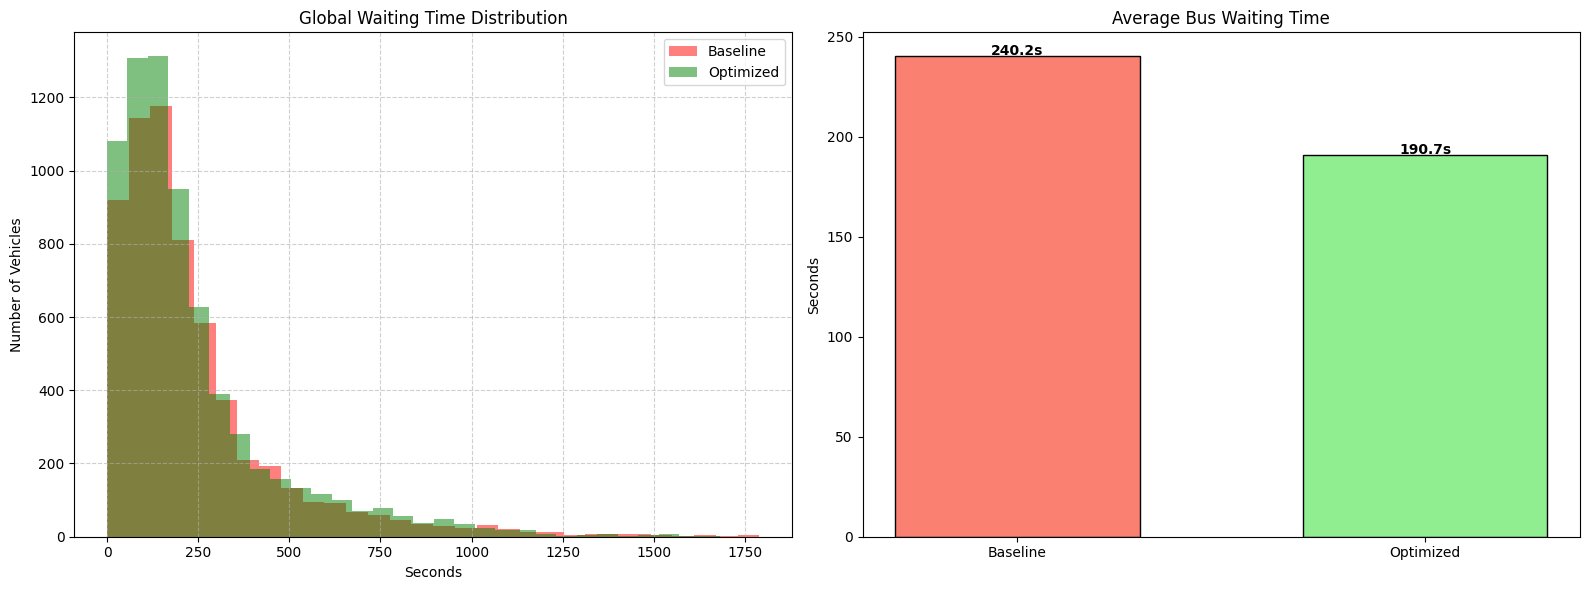

In [2]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 1. CONFIGURATION & HELPERS
# ==========================================
ROOT_DIR = os.getcwd()
SCENARIOS = {
    "Baseline": os.path.join(ROOT_DIR, "Original network results"),
    "Optimized": os.path.join(ROOT_DIR, "Updated network results")
}

def parse_tripinfo(folder):
    path = os.path.join(folder, "tripinfo.xml") 
        
    tree = ET.parse(path)
    root = tree.getroot()
    trips = []
    for trip in root.findall('tripinfo'):
        trips.append({
            'id': trip.get('id'),
            'duration': float(trip.get('duration')),
            'waitingTime': float(trip.get('waitingTime')),
            'timeLoss': float(trip.get('timeLoss'))
        })
    return pd.DataFrame(trips)

def parse_emissions(folder):
    path = os.path.join(folder, "emissions.xml")
    if not os.path.exists(path):
        return None
    
    tree = ET.parse(path)
    root = tree.getroot()
    total = {'CO2': 0, 'NOx': 0, 'fuel': 0}
    for timestep in root.findall('timestep'):
        for veh in timestep.findall('vehicle'):
            total['CO2'] += float(veh.get('CO2', 0))
            total['NOx'] += float(veh.get('NOx', 0))
            total['fuel'] += float(veh.get('fuel', 0))
    return total

# ==========================================
# 2. DATA COLLECTION
# ==========================================
results = {}

for name, path in SCENARIOS.items():
    print(f"Analyzing data for: {name}...")
    df = parse_tripinfo(path)
    emissions = parse_emissions(path)
    
    # Filter only bus data for specific bus analysis
    bus_df = df[df['id'].str.contains('bus', case=False)]
    
    results[name] = {
        'df': df,
        'bus_df': bus_df,
        'emissions': emissions,
        'avg_duration': df['duration'].mean(),
        'avg_waiting': df['waitingTime'].mean(),
        'bus_avg_waiting': bus_df['waitingTime'].mean() if not bus_df.empty else 0,
        'throughput': len(df)
    }

# ==========================================
# 3. COMPARISON TABLE
# ==========================================
print("\n" + "="*85)
print(f"{'KPI COMPARISON (GLOBAL)':<30} | {'BASELINE':<15} | {'OPTIMIZED':<15} | {'IMPROV.'}")
print("="*85)

metrics = [
    ('Avg. Travel Time (s)', 'avg_duration'),
    ('Avg. Waiting Time (s)', 'avg_waiting'),
    ('BUS Avg. Waiting (s)', 'bus_avg_waiting'),
    ('Total Throughput', 'throughput')
]

for label, key in metrics:
    b_val = results['Baseline'][key]
    o_val = results['Optimized'][key]
    improvement = ((o_val - b_val) / b_val * 100) if b_val != 0 else 0
    print(f"{label:<30} | {b_val:<15.2f} | {o_val:<15.2f} | {improvement:>+6.1f}%")

# Emissions Comparison
if results['Baseline']['emissions'] and results['Optimized']['emissions']:
    print("-" * 85)
    b_co2 = results['Baseline']['emissions']['CO2'] / 1000000 # to kg
    o_co2 = results['Optimized']['emissions']['CO2'] / 1000000
    imp_co2 = ((o_co2 - b_co2) / b_co2 * 100)
    print(f"{'Total CO2 Emissions (kg)':<30} | {b_co2:<15.2f} | {o_co2:<15.2f} | {imp_co2:>+6.1f}%")

print("="*85)

# ==========================================
# 4. VISUALIZATION
# ==========================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Waiting Time Distribution (Histogram)
ax1.hist(results['Baseline']['df']['waitingTime'], bins=30, alpha=0.5, label='Baseline', color='red')
ax1.hist(results['Optimized']['df']['waitingTime'], bins=30, alpha=0.5, label='Optimized', color='green')
ax1.set_title('Global Waiting Time Distribution')
ax1.set_xlabel('Seconds')
ax1.set_ylabel('Number of Vehicles')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot 2: Bus Performance (Bar Chart)
bus_labels = ['Baseline', 'Optimized']
bus_waits = [results['Baseline']['bus_avg_waiting'], results['Optimized']['bus_avg_waiting']]
ax2.bar(bus_labels, bus_waits, color=['salmon', 'lightgreen'], edgecolor='black', width=0.6)
ax2.set_title('Average Bus Waiting Time')
ax2.set_ylabel('Seconds')
for i, v in enumerate(bus_waits):
    ax2.text(i, v + 0.5, f"{v:.1f}s", ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('mocom_comparison_results.png', dpi=300)
plt.show()